<a href="https://colab.research.google.com/github/bfelmokh/DeepLearning_AI/blob/master/TUNINDEX_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center> **Prévision de l'indice boursier de référence de la Bourse de Tunis TUNINDEX avec RNN** </center>
<center><img src="https://i0.wp.com/tunimarkets.net/wp-content/uploads/2018/04/Bourse-de-tunis.jpg?fit=1507%2C842&ssl=1" width=100% /></center>

#####_Présenté par_: <a href="https://www.linkedin.com/in/aminekaabar/">KAABAR Amine</a>  & <a href="https://www.linkedin.com/in/bfelmokh">BENFRAJ ElMokhtar</a>
#####Source du dataset: <a href="https://www.ilboursa.com/"><img width=13% height=10% src="https://www.ilboursa.com/i/logo_ilboursa2.png"/></a>
##### <a href="https://github.com/bfelmokh/DeepLearning_AI"> Lien vers Github </a>
---
### <b>I. Introduction </b>
L’indice boursier  est  parmi  les principaux indicateurs auxquels les  investisseurs  se  réfèrent pour analyser l’état de  santé d’une place donnée. <br>
➤ L’indice TUNINDEX est un indice pondéré par les capitalisations boursières flottantes. <br>
➤ TUNINDEX est un indice statistique, de type rendement, qui mesure la tendance générale des marchés des titres de capital de la Cote de la Bourse.

_<center>●●●</center>_
### <b>II. L'apprentissage profond au service du trading en bourse </b>



<center><img src="https://blog.pumpup.fr/hs-fs/hubfs/Imported_Blog_Media/Cartographie-de-lIA-1.png?width=600&name=Cartographie-de-lIA-1.png" width=50% /></center>

Les avantages d'utilisation de l'apprentissage profond dans le domaine de la bourse: <br>
➤ Extraction des fonctionnalités d'un large ensemble de données brutes sans s'appuyer sur une connaissance préalable des prédicteurs. <br>
➤ Découverte de l'état du marché. <br>
➤ Réduction du taux des risques <br>
➤ Capaité aux machines de prendre des décisions plus rapidement qu'un humain et de mener des actions plus rapidement.
<br>
### <b>III. Type de réseaux de neurones </b>

<center><img src="https://www.digitalvidya.com/wp-content/uploads/2019/01/Image-1-2.png" width=90% /></center>

Pourquoi choisir RNN ? <br>
➤ RNN peut modéliser la séquence de données de sorte que chaque échantillon puisse être supposé dépendre des précédents <br>
➤ RNN répond aux problèmes de prédiction de classification et aux problèmes de prédiction de régression. <br><br>
Quel type de RNN utiliser ?<br>
➤ Le réseau Long Short-Term Memory, ou LSTM, est peut-être le RNN le plus performant car il surmonte les problèmes de formation d'un réseau récurrent.<br>
➤ Les réseaux LSTM utilisent des unités spéciales en plus des unités standard. Les unités LSTM comprennent une «cellule mémoire» qui peut conserver les informations en mémoire pendant de longues périodes.

### <b>IV. Architecture générale du réseau</b>

<center><img src="https://pydeeplearning.weebly.com/uploads/9/8/4/2/98422174/rnn_orig.png" width=100% /></center>

### <b>V. Application</b>
Etapes
1.   Prépartion des données d'apprentissage
2.   Prépartion du RNN: Application des couches LSTM et la régularisation Dropout.
3.   Prépartion des données de test
4.   Prédiction à partir des données d'apprentissage
5.   Visualisation du résultat

### <b>VI. Code source :</b>




In [0]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from google.colab import files
uploaded = files.upload()
import io
df = pd.read_csv(io.BytesIO(uploaded['train.csv']))

print(df)

Saving train.csv to train.csv
           date  ouverture     haut      bas  cloture   volume
0    02/04/2019    6862.12  6907.50  6855.94  6873.54  2390964
1    03/04/2019    6873.54  6900.81  6870.55  6887.35  5225168
2    04/04/2019    6887.35  6941.96  6871.73  6940.39  3493205
3    05/04/2019    6940.39  6968.90  6933.56  6967.69  2997212
4    08/04/2019    6967.69  6967.69  6892.12  6928.03  2845349
..          ...        ...      ...      ...      ...      ...
281  13/02/2020    7099.02  7126.83  7084.31  7110.26  2058206
282  14/02/2020    7110.46  7126.05  7090.95  7115.50  1531977
283  17/02/2020    7116.17  7144.12  7105.04  7138.31  1120001
284  18/02/2020    7153.80  7159.77  7116.62  7149.78  1353323
285  19/02/2020    7151.31  7160.96  7131.60  7160.96  1261318

[286 rows x 6 columns]


In [5]:
df.describe()

,ouverture,haut,bas,cloture,volume
count,286.000000,286.000000,286.000000,286.000000,2.860000e+02
mean,7013.108427,7033.641364,6985.113497,7009.296259,2.425181e+06
std,184.934335,179.376739,196.375127,190.431051,1.415617e+06
min,6116.160000,6160.820000,6000.430000,6116.160000,5.450630e+05
25%,6946.472500,6968.915000,6919.545000,6944.572500,1.423205e+06
50%,7035.370000,7053.705000,7014.275000,7033.920000,2.019675e+06
75%,7123.672500,7145.267500,7102.595000,7121.685000,3.102400e+06
max,7278.890000,7301.030000,7258.050000,7278.890000,1.031695e+07


In [8]:
#Description des champs
df.info()
df.count()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       286 non-null    object 
 1   ouverture  286 non-null    float64
 2   haut       286 non-null    float64
 3   bas        286 non-null    float64
 4   cloture    286 non-null    float64
 5   volume     286 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 13.5+ KB


date         286
ouverture    286
haut         286
bas          286
cloture      286
volume       286
dtype: int64

In [9]:
# Importing the training set
dataset_train = pd.read_csv('train.csv')
training_set = dataset_train.iloc[:, 1:2].values
print(training_set)

[[6862.12]
 [6873.54]
 [6887.35]
 [6940.39]
 [6967.69]
 [6928.03]
 [6932.11]
 [6913.64]
 [6952.83]
 [6948.31]
 [6942.07]
 [6942.86]
 [6942.17]
 [6945.24]
 [6960.48]
 [6950.37]
 [6942.07]
 [6944.33]
 [6928.27]
 [6892.52]
 [6885.12]
 [6887.21]
 [6857.02]
 [6882.74]
 [6885.24]
 [6882.55]
 [6907.82]
 [6917.78]
 [6938.11]
 [6919.82]
 [6916.12]
 [6944.35]
 [6962.54]
 [6937.48]
 [6911.43]
 [6915.46]
 [6928.09]
 [6956.91]
 [6962.23]
 [6970.93]
 [7015.75]
 [7035.16]
 [7040.96]
 [7052.8 ]
 [7081.27]
 [7071.89]
 [7022.56]
 [7074.49]
 [7089.11]
 [7076.61]
 [7081.56]
 [7080.88]
 [7102.17]
 [7103.68]
 [7102.52]
 [7123.28]
 [7148.18]
 [7162.21]
 [7065.51]
 [7149.  ]
 [7177.48]
 [7163.01]
 [7189.95]
 [7193.85]
 [7217.43]
 [7233.03]
 [7230.01]
 [7242.96]
 [7235.6 ]
 [7254.36]
 [7262.99]
 [7278.89]
 [7262.04]
 [7251.2 ]
 [7201.31]
 [7197.19]
 [7163.61]
 [7160.77]
 [7167.63]
 [7164.33]
 [7149.7 ]
 [7163.97]
 [7177.85]
 [7170.47]
 [7179.27]
 [7183.71]
 [7203.84]
 [7191.15]
 [7191.6 ]
 [7182.25]
 [7177.83]

In [0]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [0]:
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, 286):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)


In [0]:
# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [0]:
# Part 2 - Building the RNN
# Importing the Keras libraries and packages
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

In [0]:
# Initialising the RNN
regressor = Sequential()

In [0]:
# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

In [0]:
# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [0]:
# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [0]:
# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

In [0]:
# Adding the output layer
regressor.add(Dense(units = 1))
regressor.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60, 50)            10400     
_________________________________________________________________
dropout (Dropout)            (None, 60, 50)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 50)                2

In [0]:
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')


In [0]:
# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 50, batch_size = 28, verbose = 1)

Epoch 1/50
9/9 [==============================] - 0s 13ms/step - loss: 0.0060
Epoch 2/50
9/9 [==============================] - 0s 13ms/step - loss: 0.0054
Epoch 3/50
9/9 [==============================] - 0s 12ms/step - loss: 0.0054
Epoch 4/50
9/9 [==============================] - 0s 11ms/step - loss: 0.0062
Epoch 5/50
9/9 [==============================] - 0s 12ms/step - loss: 0.0041
Epoch 6/50
9/9 [==============================] - 0s 11ms/step - loss: 0.0059
Epoch 7/50
9/9 [==============================] - 0s 12ms/step - loss: 0.0057
Epoch 8/50
9/9 [==============================] - 0s 12ms/step - loss: 0.0062
Epoch 9/50
9/9 [==============================] - 0s 12ms/step - loss: 0.0053
Epoch 10/50
9/9 [==============================] - 0s 11ms/step - loss: 0.0069
Epoch 11/50
9/9 [==============================] - 0s 11ms/step - loss: 0.0054
Epoch 12/50
9/9 [==============================] - 0s 11ms/step - loss: 0.0061
Epoch 13/50
9/9 [==============================] - 0s 11ms/st

In [0]:
# Part 3 - Making the predictions and visualising the results
# Getting the real stock price
uploaded = files.upload()
df3 = pd.read_csv(io.BytesIO(uploaded['test.csv']))
print(df3)


In [0]:
dataset_test = pd.read_csv('test.csv')
real_index = dataset_test.iloc[:, 1:2].values

In [0]:
# Getting the predicted Index
dataset_total = pd.concat((dataset_train['ouverture'], dataset_test['ouverture']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 74):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_index = regressor.predict(X_test)
#print(predicted_index)
predicted_index = sc.inverse_transform(predicted_index)
print("Predicted Index")
print(predicted_index)
print("Real Index")
print(real_index)

[[0.8503109 ]
 [0.85577315]
 [0.862605  ]
 [0.86866844]
 [0.8722428 ]
 [0.87221843]
 [0.8687898 ]
 [0.864186  ]
 [0.86208194]
 [0.86631256]
 [0.8744461 ]
 [0.8818308 ]
 [0.8831272 ]
 [0.86833316]]
[[7104.8423]
 [7111.1934]
 [7119.1367]
 [7126.1865]
 [7130.343 ]
 [7130.3145]
 [7126.328 ]
 [7120.975 ]
 [7118.5283]
 [7123.4478]
 [7132.905 ]
 [7141.491 ]
 [7142.9985]
 [7125.797 ]]
[[7174.01]
 [7170.94]
 [7179.81]
 [7173.11]
 [7147.42]
 [7135.52]
 [7150.52]
 [7176.88]
 [7210.  ]
 [7182.49]
 [7163.22]
 [7130.67]
 [7020.94]
 [6915.45]]


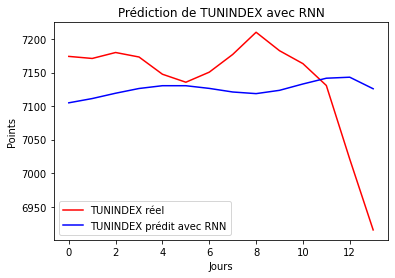

In [0]:
# Visualising the results
plt.plot(real_index, color = 'red', label = 'TUNINDEX réel')
plt.plot(predicted_index, color = 'blue', label = 'TUNINDEX prédit avec RNN')
plt.title('Prévision de TUNINDEX avec RNN')
plt.xlabel('Jours')
plt.ylabel('Points')
plt.legend()
plt.show()